# ASSOCIATION RULE MINING

A technique to observe the hidden relationships between variables in a dataset, which are then used to make predictions/decisions.

Dataset used: Online Retail Dataset
(https://archive.ics.uci.edu/dataset/352/online+retail)
Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

In [ ]:
# Importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data collection
dataset = pd.read_csv('ecomm.csv', encoding = 'unicode_escape')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


We can observe that:
* InvoiceDate has to be converted into a date time Datatype.

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
dataset.shape

(541909, 8)

In [ ]:
dataset.isnull().sum()

# There are null-values in 2 columns (Description and Customer ID).

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
dataset.duplicated().sum()

# We can observe that there are 2533 duplicate entries in the dataset.

5268

In [ ]:
# Analysing the quantitative values
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
len(dataset['CustomerID'].unique())

4373

## **CUSTOMER SEGMENTATION USING K MEANING CLUSTERING AND RFM**

### Calculaing the Recency:

The days since the last purchase for each customers.

1. We need keep only the most recent date for each customer.
2. Rank each customer based on how recent their purchase was.
3. Assign a recency score.

In [ ]:
# Converting the InvoiceDate into datetime Datatype.
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

# Sorting the datset by CustomerID and Date
dataset.sort_values(['CustomerID', 'InvoiceDate'])

# Finding the most recent date for each customer and ranking each customer based on how recent their purchase was.
dataset['rank'] = dataset.groupby(['CustomerID'])['InvoiceDate'].rank(method = 'min')

# Recency score.
df_recency = dataset[dataset['rank'] == 1]
df_recency.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,1.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,1.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,1.0
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,1.0
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,1.0


We can see that more than one entry for a customer has the same rank, this is because the customer has done multiple purchases (different products) on the same day and `rank('min')` assigns the same rank for all these transactions done on the same date.

In [ ]:
# Assigning recency score to each customer by calculating the difference between the most recent purchase and a reference date.

# Reference date - latest(most recent) transcation date
ref_date = dataset['InvoiceDate'].min()
print(ref_date)

df_recency['Recency'] = df_recency['InvoiceDate'] -  ref_date

# Converting the difference into days.
df_recency['Recency'] = df_recency['Recency'].dt.days

df_recency.head(10)

2010-12-01 08:26:00


<ipython-input-11-8e15d4f31298>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['Recency'] = df_recency['InvoiceDate'] -  ref_date
<ipython-input-11-8e15d4f31298>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['Recency'] = df_recency['Recency'].dt.days


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,1.0,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,1.0,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,1.0,0
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,1.0,0
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,1.0,0


### Calculaing the Frequency:

The number of times each customer made a purchase on the platform. Helps identify loyal customers.

In [ ]:
# Grouping by Customer ID and Counting the number of Transactions
frequency = dataset.groupby(['CustomerID'])['InvoiceDate'].count()
print(frequency)

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceDate, Length: 4372, dtype: int64


In [ ]:
# Converting the frequencies into dataframes

df_frequency = pd.DataFrame(frequency).reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the frequency with the recency data
rec_freq = df_frequency.merge(df_recency, on = 'CustomerID')
rec_freq.head()

,CustomerID,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,rank,Recency
0,12346.0,2,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,1.0,48
1,12347.0,182,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,1.0,6
2,12347.0,182,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,Iceland,1.0,6
3,12347.0,182,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,Iceland,1.0,6
4,12347.0,182,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,Iceland,1.0,6


### Calculaing the Monetary Value:

The total amount each customer has spent on the platform.

In [ ]:
# Calculating the value of each transaction - Quantity * Unit
rec_freq['Value'] = rec_freq['Quantity'] * rec_freq['UnitPrice']

# Grouping by customers and summing the total amount spent by each customer.
m = rec_freq.groupby(['CustomerID'])['Value'].sum()
print(m)

CustomerID
12346.0    77183.60
12347.0      711.79
12348.0      892.80
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      100.21
18283.0      108.45
18287.0      765.28
Name: Value, Length: 4372, dtype: float64


In [ ]:
# Converting this into a DataFrame
m = pd.DataFrame(m)

# Renaming the column names
m.columns = ['Monetary_value']
m.head()

,Monetary_value
CustomerID,
12346.0,77183.60
12347.0,711.79
12348.0,892.80
12349.0,1757.55
12350.0,334.40


In [ ]:
# Merging the monetary value to recency and frequency

rfm = m.merge(rec_freq, on = 'CustomerID')

rfm.head()

,CustomerID,Monetary_value,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,rank,Recency,Value
0,12346.0,77183.60,2,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,1.0,48,77183.6
1,12347.0,711.79,182,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,1.0,6,25.2
2,12347.0,711.79,182,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,Iceland,1.0,6,17.0
3,12347.0,711.79,182,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,Iceland,1.0,6,39.0
4,12347.0,711.79,182,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,Iceland,1.0,6,23.4


In [ ]:
final_dataset = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary_value']]

final_dataset.head()

,CustomerID,Recency,Frequency,Monetary_value
0,12346.0,48,2,77183.60
1,12347.0,6,182,711.79
2,12347.0,6,182,711.79
3,12347.0,6,182,711.79
4,12347.0,6,182,711.79


### Removing Outliers

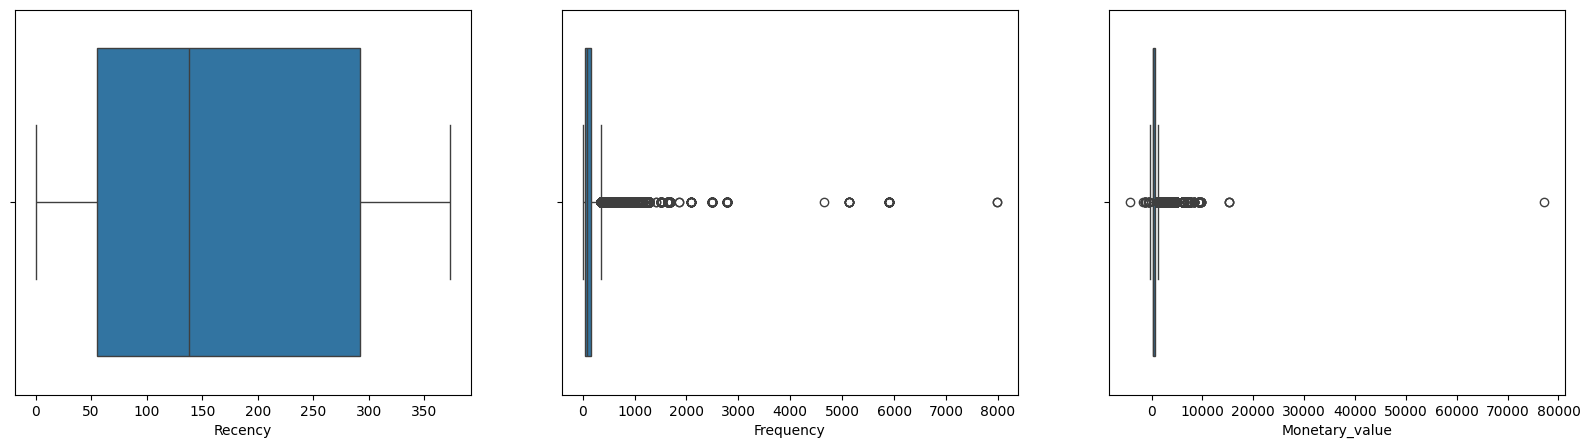

In [ ]:
ls = ['Recency', 'Frequency', 'Monetary_value']
fig, axes = plt.subplots(1, 3, figsize = (20, 5)) # Create one subplot with all 3 boxplots

for i, ax in zip(ls, axes):
    sns.boxplot(x = final_dataset[i], ax = ax)
plt.show()

#### **Observations**:
1. Recency has no visible outliers.
2. Frequency and Monetary Value have many outliers which needs to be removed before using to build the model.

To identify outliers, we will compute Z-Score. Z-Scores tell us how far away from the mean a data point is.

    * Z-Score = 0 → The data point is exactly at the mean.
    * Z-Score = 1 → The data point is 1 standard deviation above the mean.
    * Z-Score = -1 → The data point is 1 standard deviation below the mean.

In [ ]:
from scipy import stats

new_rfm = final_dataset[['Recency', 'Frequency', 'Monetary_value']]
z_score = stats.zscore(new_rfm) # Computing z-score for each sample

# Removing samples with z_score < 3
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score < 3).all(axis = 1) # Checking for samples with z-score less than 3
new_rfm = new_rfm[filtered_entries]

print(new_rfm)

        Recency  Frequency  Monetary_value
1             6        182          711.79
2             6        182          711.79
3             6        182          711.79
4             6        182          711.79
5             6        182          711.79
...         ...        ...             ...
100805      172         70          765.28
100806      172         70          765.28
100807      172         70          765.28
100808      172         70          765.28
100809      172         70          765.28

[97562 rows x 3 columns]


### Pre-processing the data

Standardization scales the data to have a mean of 0 and a standard deviation of 1.




In [ ]:
from sklearn.preprocessing import StandardScaler

# Dropping duplicate samples
new_rfm = new_rfm.drop_duplicates()

col_names = new_rfm.columns
features = new_rfm[col_names]

# Scaling the data
scaler = StandardScaler()
features = scaler.fit_transform(features.values)

# Converting into DataFrame
features = pd.DataFrame(features, columns = col_names)
features.head()

,Recency,Frequency,Monetary_value
0,-1.204797,0.982064,1.039143
1,-1.128661,-0.466491,1.568334
2,1.747602,-0.063582,4.096466
3,-0.722600,-0.600794,-0.064172
4,-0.604166,0.147466,-0.174974


### Building a Customer Segmentation Model using K-Means Clustering

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the optimal number of clusters
WCSS = []
silhouette_scores = []
for clusters in range(2, 11):
    kmeans = KMeans(n_clusters = clusters, init = 'k-means++')
    kmeans.fit(features)
    WCSS.append(kmeans.inertia_)
    # Computing the sillouette score to evaluate the quality of the clustering
    score = silhouette_score(features, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(score)

print(WCSS)
print(silhouette_scores)

[9188.643129195174, 6421.980388830145, 4505.070144667133, 3910.360348026333, 3412.8160882236534, 3021.620319453836, 2727.203847771063, 2501.5566603564807, 2420.680885606667]
[0.3368858708233112, 0.390843091894586, 0.42441217667394227, 0.3707381933436189, 0.37896724270936827, 0.3232167029501403, 0.32865413376945873, 0.32706067920832393, 0.28544133857503745]


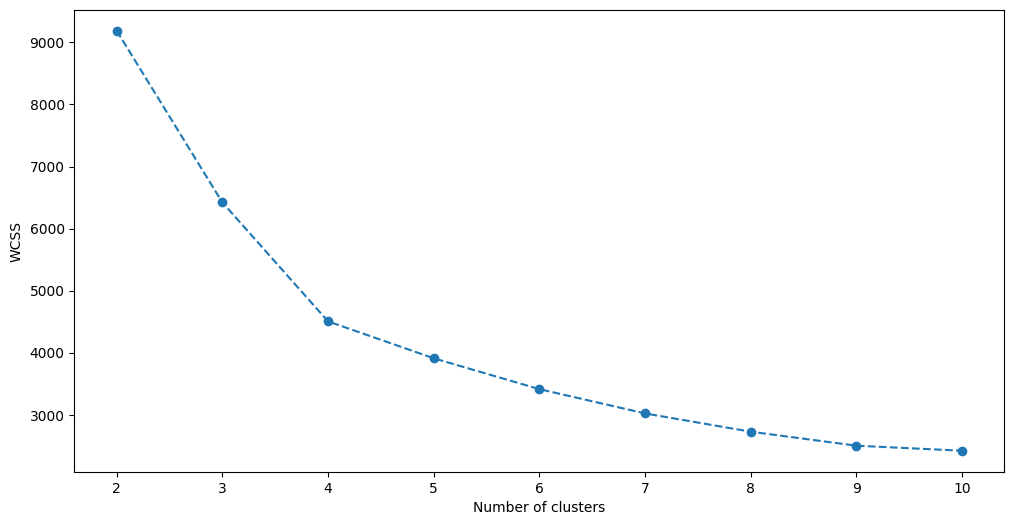

In [ ]:
# PLotting an elbow graph to visuaise the optimal number of clusters
plt.figure(figsize = (12,6))
plt.plot(range(2, 11), WCSS, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Training the K-Means algorithm with 4 clusters

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y = kmeans.fit_predict(features)

new_rfm['Cluster'] = y
print(new_rfm)

        Recency  Frequency  Monetary_value  Cluster
1             6        182          711.79        0
32           15         31          892.80        2
49          355         73         1757.55        2
122          63         17          334.40        0
139          77         95          296.50        0
...         ...        ...             ...      ...
100691      300          9          173.90        1
100700       96         10          180.60        0
100710      193          7           80.82        1
100717      247         13          100.21        1
100781      172         70          765.28        2

[4313 rows x 4 columns]


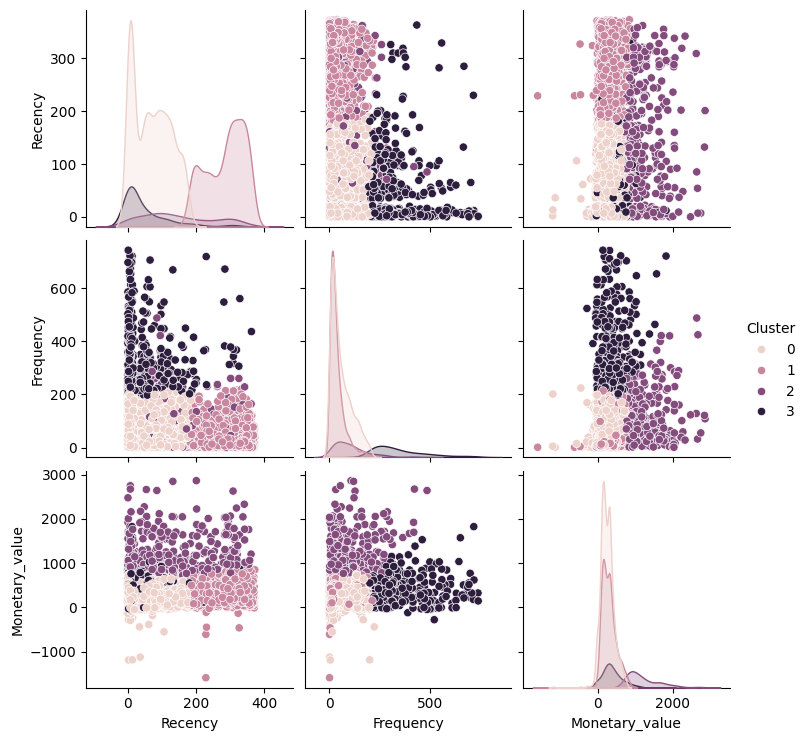

In [ ]:
# Relationships between features and their cluster distribution.
sns.pairplot(new_rfm, hue = 'Cluster', vars=['Recency', 'Frequency', 'Monetary_value'])
plt.show()

### **Observations**
1. Customers in Cluster 3 have a high frequency and Monetary value but less recency.
        Recent buyers, loyal and high spenders.
2. Custermers in Cluster 2 have high recency and moderate monetary value but low frequency
        Less engaged customers
3. Customers in Cluster 1 and 0 are intermediates.

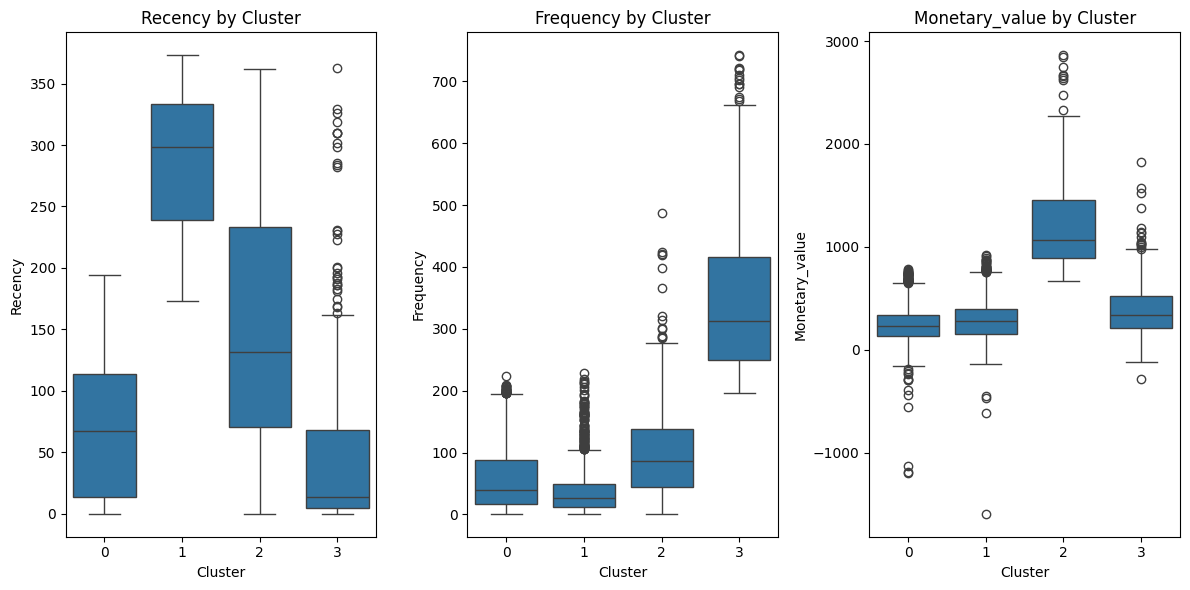

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary_value']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=col, data=new_rfm)
    plt.title(f'{col} by Cluster')
plt.tight_layout()
plt.show()


### **Observations**
1. Customers in Cluster 3 have low median **recency** and Cluster 2 have the highest median recency (at-risk).
2. Cluster 3 has the highest **frequency** and Cluster 2 has the lowest frequency.
3. Cluster 0 has the highest **monetary value** (high spenders) and cluster 1 has the lowest spenders.

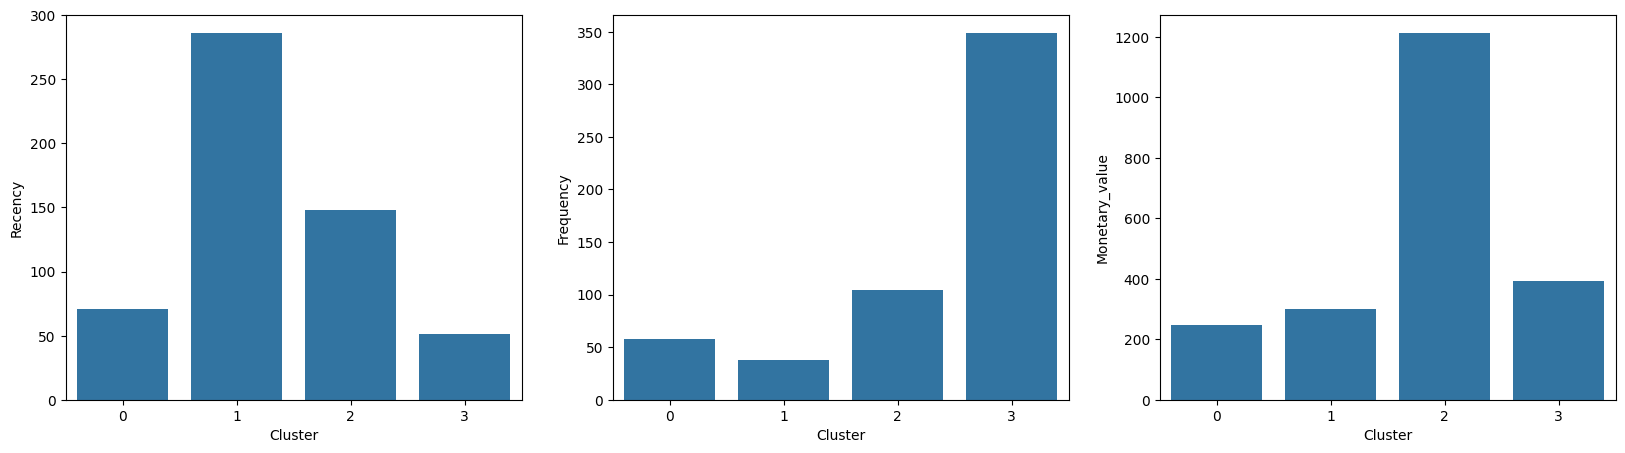

In [ ]:
avg_df = new_rfm.groupby(['Cluster'], as_index=False).mean()

fig, axes = plt.subplots(1, 3, figsize = (20, 5))
for i, ax in zip(ls, axes):
    sns.barplot(x = avg_df['Cluster'], y = avg_df[i], ax = ax)
plt.show()

### **Insights**:

1. Cluster 3 has the most values customers - Focus on retention stratergies and offers.
2. Clusters 2 has the leasted engaged customers - Campaigns and offers to win them back
3. Cluster 0 - Moderate customers -  Focus on converting them into High valued customers since they have a monetary value of moderate to high, and a moderate recency and frequency.

    


## **MARKET BASKET ANALYSIS**

Analyzing the items customers purchase together to understand their purchasing habits and preferences.

### APRIORI ALGORITHM

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

dataset.shape

(541909, 9)

In [ ]:
# Checking for null values
dataset.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
rank,135080


Market Basket Analysis mainly focuses on the Transaction ID and the products bought during the transaction. Hence we drop all the rows with null values for descriptions and invoiceID.

In [ ]:
# Cleaning the data for apriori algorithm

# removing the spaces in the description
dataset['Description'] = dataset['Description'].str.strip()

dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0


In [ ]:
# Dropping the rows with missing 'InvoiceData' and 'Description'
dataset.dropna(subset = ['Description'], axis = 0, inplace = True)

dataset.shape

(540455, 9)

In [ ]:
# Converting the 'InvoiceDate' into string for filtering
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')

# Dropping all transactions starting with letter 'c', it indicates a cancellation
dataset = dataset[~dataset['InvoiceNo'].str.contains('C')]

dataset.shape

(531167, 9)

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0


In [ ]:
print(dataset['Country'].value_counts(normalize = True))

Country
United Kingdom          0.915283
Germany                 0.017023
France                  0.015829
EIRE                    0.014862
Spain                   0.004678
Netherlands             0.004449
Belgium                 0.003824
Switzerland             0.003703
Portugal                0.002826
Australia               0.002231
Norway                  0.002018
Italy                   0.001427
Channel Islands         0.001408
Finland                 0.001290
Cyprus                  0.001156
Sweden                  0.000849
Unspecified             0.000840
Austria                 0.000749
Denmark                 0.000715
Poland                  0.000621
Japan                   0.000604
Israel                  0.000555
Hong Kong               0.000535
Singapore               0.000418
Iceland                 0.000343
USA                     0.000337
Canada                  0.000284
Greece                  0.000273
Malta                   0.000211
United Arab Emirates    0.000128
Eu

In [ ]:
# Analysing the association rules in United Kingdom, Germany, France, Belgium

# Processing the transaction data for specific country and organising it into baskets.
def create_basket(dataset, country_name):
    basket = (
                dataset[dataset['Country'] == country_name]         # Filtering out the transactions by country_name
                .groupby(['InvoiceNo', 'Description'])['Quantity'].sum()     # Grouping the filtered data by InvoiceNo and Description and aggregating the total quantity of each product
                .unstack()          # converts the grouped data into pivot table-format
                .reset_index()
                .fillna(0)          # Replace NAN values with 0
                .set_index('InvoiceNo')
              )
    return basket

In [ ]:
basket_fr = create_basket(dataset, 'Spain')

In [ ]:
print((basket_fr > 0).sum(axis=1).describe())

count     90.000000
mean      27.377778
std       24.637405
min        1.000000
25%       11.000000
50%       22.000000
75%       39.750000
max      117.000000
dtype: float64


In [ ]:
print(basket_fr.shape)  # Rows = transactions, Columns = unique items

(90, 1104)


In [ ]:
def hot_encode(x):
    return 1 if x > 0 else 0

# Apply the function to the entire DataFrame
basket_fr = basket_fr.applymap(hot_encode)

# Verify the data
print("Unique values in basket_fr:")
print(np.unique(basket_fr.values.flatten()))  # Should show only 0 and 1

basket_fr = basket_fr.astype('int8')

Unique values in basket_fr:
[0 1]


<ipython-input-39-c9cc48098c85>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_fr = basket_fr.applymap(hot_encode)


In [ ]:
!pip install --upgrade mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Building the model

dataset_sample = dataset.sample(frac=0.1, random_state=42)

# Determining the frequent items
freq_items_fr = apriori(basket_fr, min_support = 0.05, use_colnames = True)

# Generating association rules
ass_rules_fr = association_rules(freq_items_fr, metric = 'lift', min_threshold = 1)

# Sorting and displaying the results
ass_rules_fr.sort_values('confidence', ascending = False, inplace = True)
ass_rules_fr.head()

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'